In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import matplotlib.pyplot as plt
from utils import *

2023-08-27 09:31:48.303 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-08-27 09:31:48.305 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [3]:
df = read_books('data/simplified_book_list.xlsx')
df.head()

2023-08-27 09:31:48.451 
  command:

    streamlit run /Users/aayushiverma/Documents/Github/My-Book-Stats/.venv/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2023-08-27 09:31:48.451 No runtime found, using MemoryCacheStorageManager


,Title,Author l-f,Additional Authors,ISBN,ISBN13,Number of Pages,Year Published,Original Publication Year,Year Read,user_genre,fiction_status,user_tags,ownership_status,buy?
0,Grimm's Fairy Stories,"Grimm, Jacob",Wilhelm Grimm,NaN,NaN,144.0,2004.0,1812,2014.0,NaN,fiction,NaN,NaN,NaN
1,The Complete Poems of John Keats,"Keats, John",NaN,NaN,NaN,512.0,1994.0,1820,2021.0,classical,fiction,NaN,NaN,y
2,The Secret Garden,"Burnett, Frances Hodgson",NaN,0517189607,9.780517e+12,331.0,1998.0,1911,2007.0,NaN,fiction,NaN,NaN,y
3,Murder in the Cathedral,"Eliot, T.S.",NaN,0156632772,9.780157e+12,148.0,1964.0,1936,2021.0,classical,fiction,NaN,NaN,y
4,Blubber,"Blume, Judy",NaN,NaN,NaN,127.0,2006.0,1974,2007.0,NaN,fiction,NaN,NaN,y


In [5]:
# raw = pd.read_excel('data/goodreads_library_export.xlsx')
# raw = transform_goodreads_output(raw)
# raw.head()

In [6]:
total = df['Title'].count()
print(f'Total books read: {total}')

Total books read: 270


In [7]:
grouped = df.groupby(['Year Published']).count()['Title']

In [8]:
grouped_df = df.groupby(['Original Publication Year']).count().reset_index()

fig = px.bar(grouped_df,
             x='Original Publication Year',
             y='Title',
             title='Total Books Read by Year Published',
             labels={
                 'Original Publication Year':'Original Publication Year',
                 'Title':'Total Books Read'}
             )
fig.show()

In [9]:
grouped_df = df.groupby(['Year Read']).count().reset_index()

fig = px.bar(grouped_df,
             x='Year Read',
             y='Title',
             title='Total Books Read by Year',
             labels={
                 'Year Read':'Year Read',
                 'Title':'Total Books Read'}
             )
fig.show()

In [16]:
fig = px.scatter(
    df,
    x='Original Publication Year', 
    y='Year Read',
    title='Year I Read Books vs Year Book was Published',
    labels={
        'Year Read':'Year Read',
        'Original Publication Year':'Original Publication Year'}
    )
fig.show()

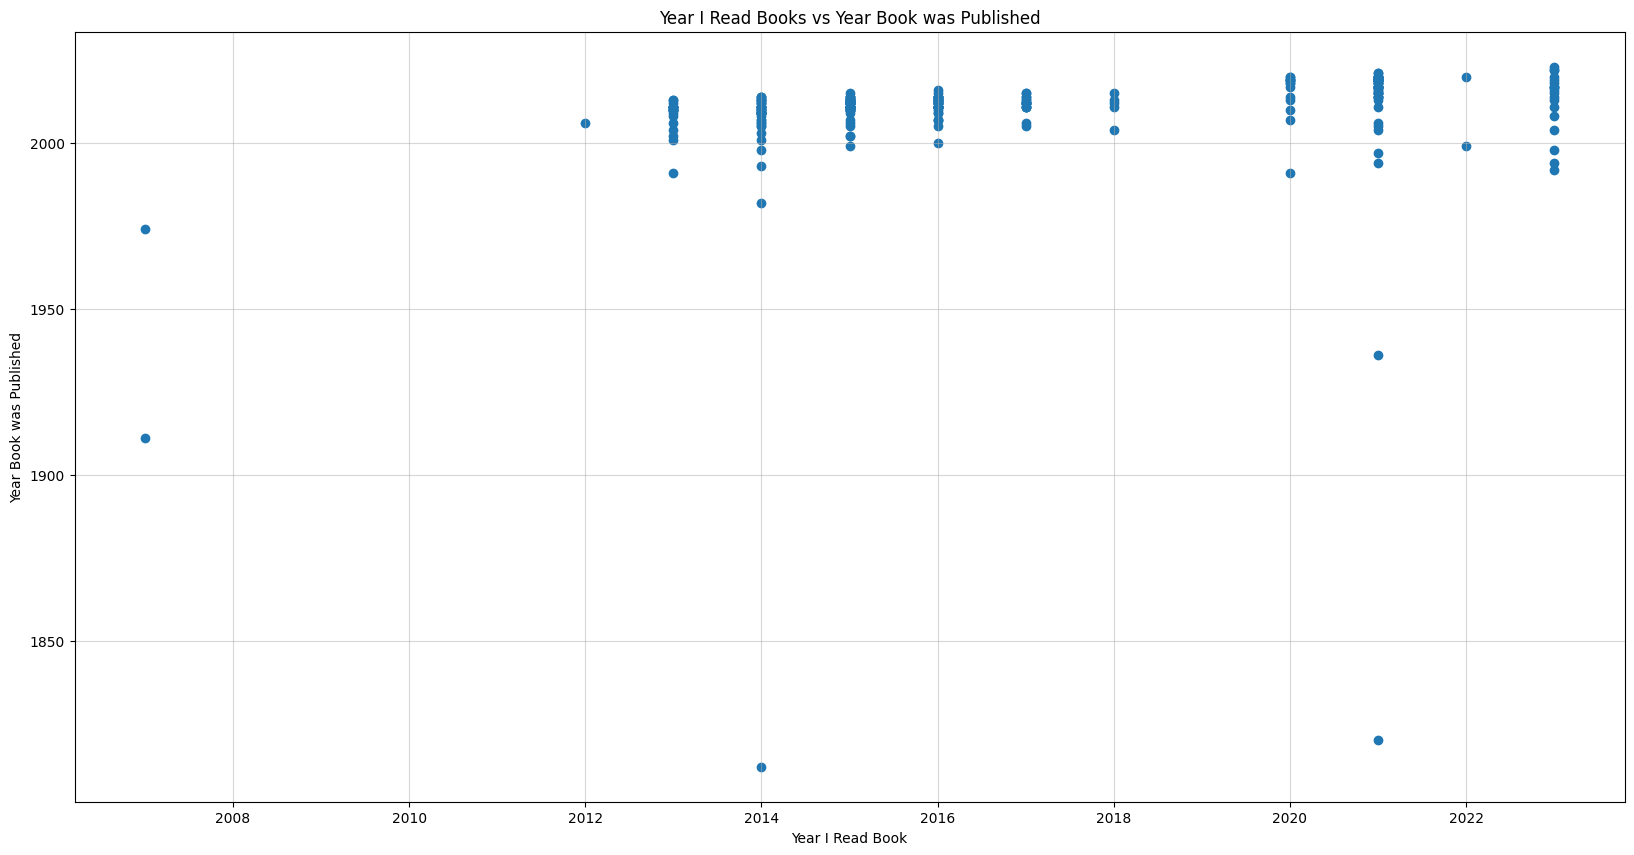

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(df['Year Read'], df['Original Publication Year'])
plt.title('Year I Read Books vs Year Book was Published')
plt.xlabel('Year I Read Book')
plt.ylabel('Year Book was Published')
plt.grid(alpha=0.5)

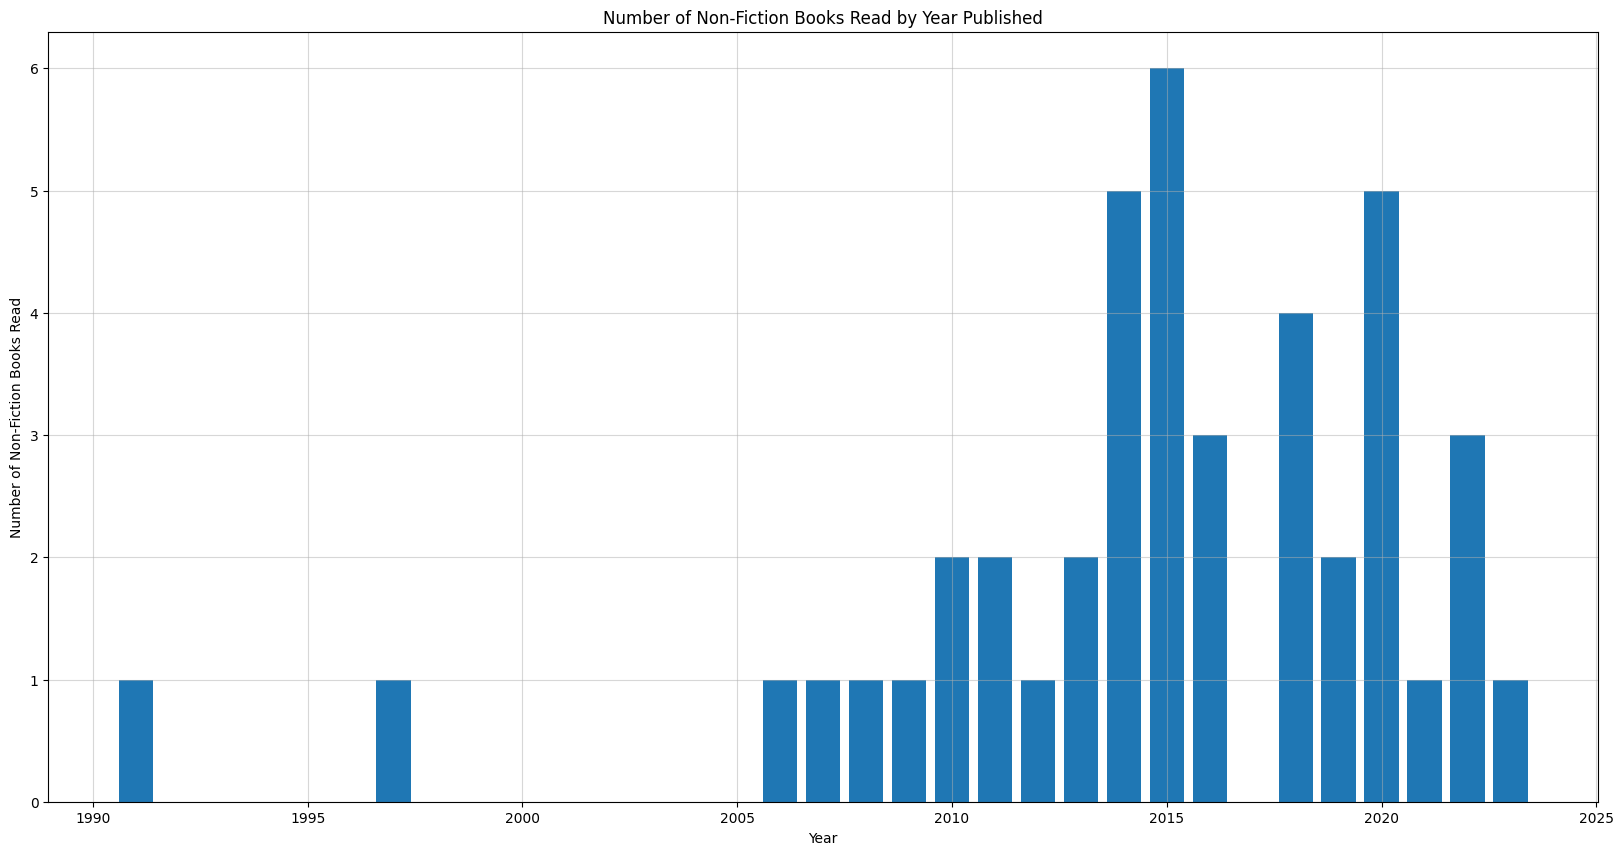

In [11]:
tmp = df[df['fiction_status']=='non-fiction'].groupby(['Year Published'])['fiction_status'].count()

plt.figure(figsize=(20,10))
plt.bar(tmp.index, tmp.values)
plt.title('Number of Non-Fiction Books Read by Year Published')
plt.xlabel('Year')
plt.ylabel('Number of Non-Fiction Books Read')
plt.grid(alpha=0.5)

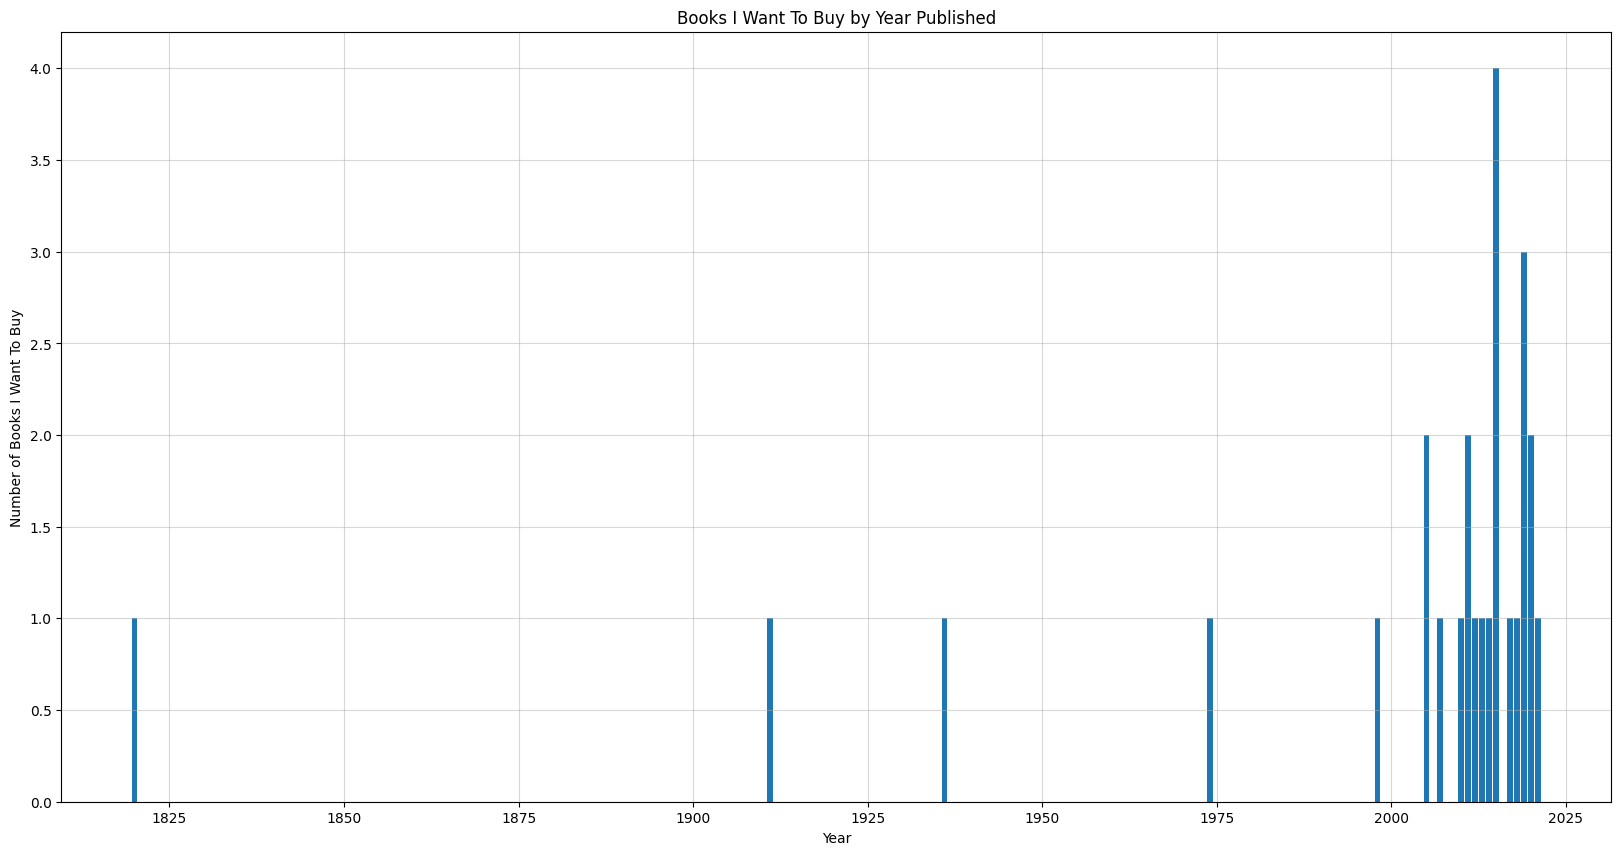

In [12]:
tmp = df[df['buy?']=='y'].groupby(['Original Publication Year'])['buy?'].count()

plt.figure(figsize=(20,10))
plt.bar(tmp.index, tmp.values)
plt.title('Books I Want To Buy by Year Published')
plt.xlabel('Year')
plt.ylabel('Number of Books I Want To Buy')
plt.grid(alpha=0.5)